## Importing Libraries

In [1]:
import pandas as pd
import numpy as np                  
import seaborn as sns    
import matplotlib.pyplot as plt       
import warnings   
import scipy.stats as st  
!pip install wquantiles

In [2]:
import wquantiles as wq

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
plt.style.use('fivethirtyeight')


from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv("C:/Users/adapa/OneDrive/Desktop/USD/3'rd Semester/Data Analysis, Decision Making and Visualization/Data Visualization Final Project Everything/Data Analyst Final Dataset/gsearch_jobs.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29738 entries, 0 to 29737
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           29738 non-null  int64  
 1   index                29738 non-null  int64  
 2   title                29738 non-null  object 
 3   company_name         29738 non-null  object 
 4   location             29718 non-null  object 
 5   via                  29729 non-null  object 
 6   description          29738 non-null  object 
 7   extensions           29738 non-null  object 
 8   job_id               29738 non-null  object 
 9   thumbnail            16169 non-null  object 
 10  posted_at            29738 non-null  object 
 11  schedule_type        29561 non-null  object 
 12  work_from_home       13033 non-null  object 
 13  salary               5381 non-null   object 
 14  search_term          29738 non-null  object 
 15  date_time            29738 non-null 

In [5]:
df.nunique()

Unnamed: 0             29738
index                   3198
title                  11446
company_name            7327
location                 612
via                      525
description            21112
extensions              4827
job_id                 29718
thumbnail               5315
posted_at                 78
schedule_type             17
work_from_home             1
salary                  1220
search_term                1
date_time               3104
search_location            1
commute_time               0
salary_pay              1220
salary_rate                3
salary_avg               620
salary_min               378
salary_max               416
salary_hourly            236
salary_yearly            376
salary_standardized      614
description_tokens      6126
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')

In [7]:
df.shape[1] #The number of Columns in the DataSet Initially

27

In [8]:
df.shape[0] #The number of Rows in the DataSet Initially

29738

In [9]:
df.isna().sum()

Unnamed: 0                 0
index                      0
title                      0
company_name               0
location                  20
via                        9
description                0
extensions                 0
job_id                     0
thumbnail              13569
posted_at                  0
schedule_type            177
work_from_home         16705
salary                 24357
search_term                0
date_time                  0
search_location            0
commute_time           29738
salary_pay             24357
salary_rate            24357
salary_avg             24357
salary_min             24670
salary_max             24670
salary_hourly          26320
salary_yearly          27784
salary_standardized    24357
description_tokens         0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,"As the leader in cloud-managed IT, Cisco Merak...","['22 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,22 hours ago,Full-time,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tableau', 'aws', 'sql']"
1,1,1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,As a Senior Business Analyst you will contribu...,"['53 minutes ago', 'Work from home', 'Full-tim...",eyJqb2JfdGl0bGUiOiJFbnRyeSBMZXZlbCAtIEJ1c2luZX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,53 minutes ago,Full-time,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,Overview:\n\nAmyx is seeking to hire a Data An...,"['3 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QvUmVzZWFyY2...,NaN,3 hours ago,Full-time,NaN,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'excel', 'azure']"
3,3,3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,I am looking for someone to help me build an A...,"['23 hours ago', 'Work from home', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QvQUkgZXhwZX...,NaN,23 hours ago,Contractor,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['excel']
4,4,4,Data Analyst,Bank Street College of Education,United States,via Higher Education Recruitment Consortium (H...,Position Vacancy – Data Analyst to support the...,"['20 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,20 hours ago,Full-time,NaN,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['powerpoint', 'excel']"


In [12]:
df.tail()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
29733,29733,992,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '76,798–130,764 a year', 'Ful...",eyJqb2JfdGl0bGUiOiJNYXJrZXRpbmcgRGF0YSBcdTAwMj...,NaN,23 hours ago,Full-time,NaN,"76,798–130,764 a year",data analyst,2022-11-04 03:40:23.706734,United States,NaN,76798–130764,a year,103781.0,76798.0,130764.0,NaN,103781.0,103781.0,"['tableau', 'python', 'snowflake', 'power_bi',..."
29734,29734,993,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-11-24 04:00:08.710801,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
29735,29735,994,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-12-07 04:00:12.563831,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
29736,29736,995,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-12-08 04:00:15.975728,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
29737,29737,996,Institutional Credit Management - Lending Data...,Citi,United States,via My ArkLaMiss Jobs,The Institutional Credit Management (ICM) grou...,"['24 hours ago', '105,850–158,780 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJJbnN0aXR1dGlvbmFsIENyZWRpdC...,https://encrypted-tbn0.gstatic.com/images?q=tb...,24 hours ago,Full-time,NaN,"105,850–158,780 a year",data analyst,2023-01-25 04:00:26.521124,United States,NaN,105850–158780,a year,132315.0,105850.0,158780.0,NaN,132315.0,132315.0,"['cognos', 'tableau']"


## Data Cleaning && Statistical Analysis

In [13]:
salary_stats = df[['salary_avg', 'salary_min', 'salary_max']].describe()

salary_stats

,salary_avg,salary_min,salary_max
count,5381.000000,5068.000000,5068.000000
mean,36953.914886,31201.148475,43949.938155
std,52145.738510,43962.094858,61832.636497
min,9.000000,8.000000,10.000000
25%,31.500000,19.550000,45.000000
50%,57.500000,45.000000,75.000000
75%,90000.000000,76798.000000,103661.000000
max,288000.000000,230000.000000,346000.000000


In [14]:
hourly_jobs = df[df['salary_hourly'].notnull()]
yearly_jobs = df[df['salary_yearly'].notnull()]

# Basic statistics for hourly and yearly salary postings
hourly_salary_stats = hourly_jobs[['salary_avg', 'salary_min', 'salary_max']].describe()
yearly_salary_stats = yearly_jobs[['salary_avg', 'salary_min', 'salary_max']].describe()

hourly_salary_stats, yearly_salary_stats

(        salary_avg   salary_min   salary_max
 count  3418.000000  3207.000000  3207.000000
 mean     43.327017    31.030087    55.768993
 std      23.150282    19.211305    31.263303
 min       9.000000     8.000000    10.000000
 25%      26.000000    16.000000    35.000000
 50%      37.500000    25.000000    50.000000
 75%      57.500000    40.000000    75.000000
 max     300.000000   200.000000   500.000000,
           salary_avg     salary_min     salary_max
 count    1954.000000    1854.000000    1854.000000
 mean   101661.383959   85215.591683  120016.902594
 std     30210.201878   26109.180541   36409.197335
 min     29289.840000   27519.630000   35000.000000
 25%     85000.000000   72000.000000   99691.200000
 50%     96500.000000   77000.000000  116000.000000
 75%    112872.000000   95000.000000  131475.000000
 max    288000.000000  230000.000000  346000.000000)

## Data Cleaning

   1] company_name: The name of the company.
   2] location: The geographical location of the job.
   3] date_time: The date and time of the job posting.
   4] salary_avg: The average salary for the job.
   5] salary_min: The minimum salary for the job.
   6] salary_max: The maximum salary for the job.
   7] Full-Time require: Whether the job is full-time.
   8] Health insurance: If health insurance is provided.
   9] Dental insurance: If dental insurance is provided.
   10] Paid time off: If paid time off is included.
   11] Work from home: If remote work is possible.
   12] mysql: If knowledge of MySQL is required.
   13] excel: If proficiency in Excel is required.
   14] python: If Python programming skills are required.
   15] r: If R programming skills are required.
   16] c: If C programming skills are required.
   17] java: If Java programming skills are required.
   18] aws: If familiarity with AWS is required.
   19] spark: If experience with Apache Spark is required.

In [15]:
skills_series = df['description_tokens'].dropna().explode()
skills_count = skills_series.value_counts()

# Displaying the top 20 most frequently required skills
top_skills = skills_count.head(20)
top_skills

[]                                                                         6180
['excel']                                                                  1035
['sql']                                                                     985
['sql', 'excel']                                                            570
['tableau', 'microstrategy', 'sql', 'jira']                                 272
['python', 'power_bi']                                                      226
['tableau']                                                                 216
['go']                                                                      181
['power_bi']                                                                173
['power_bi', 'excel']                                                       173
['powerpoint', 'excel']                                                     154
['spreadsheet']                                                             152
['r']                                   

In [16]:
# Counting the occurrences of each location
location_counts = df['location'].value_counts()

# Displaying the top 20 locations with the most job postings
top_locations = location_counts.head(20)
top_locations

Anywhere                   7094
 Anywhere                  5939
  United States            4184
United States              3660
Kansas City, MO             528
  Oklahoma City, OK         501
  Kansas City, MO           466
Oklahoma City, OK           380
Jefferson City, MO          350
  Jefferson City, MO        336
  Bentonville, AR           259
Columbia, MO                211
Tulsa, OK                   200
  Tulsa, OK                 179
  Wichita, KS               163
Wichita, KS                 159
Bentonville, AR             154
Overland Park, KS           149
  Topeka, KS                134
  Springfield, MO           131
Name: location, dtype: int64

In [17]:
# Counting the occurrences of each company
company_counts = df['company_name'].value_counts()

# Displaying the top 20 companies with the most job postings
top_companies = company_counts.head(20)
top_companies

Upwork                                     4741
Walmart                                    1032
EDWARD JONES                                732
Talentify.io                                629
Corporate                                   611
Cox Communications                          517
Dice                                        285
Insight Global                              260
Centene Corporation                         168
Staffigo Technical Services, LLC            167
Jobot                                       107
Elevance Health                             104
Harnham                                      99
Saint Louis County Clerks Office             91
UnitedHealth Group                           91
State of Missouri                            90
General Dynamics Information Technology      81
Apex Systems                                 78
MTC Holding Corporation                      73
Sam's Club                                   72
Name: company_name, dtype: int64

In [18]:
# Extracting and counting the job types from the extensions column
job_types_series = df['extensions'].dropna().explode()
job_types_count = job_types_series.value_counts()

# Displaying the top job types
top_job_types = job_types_count.head(20)
top_job_types

['17 hours ago', 'Full-time']                                                                                450
['18 hours ago', 'Full-time']                                                                                449
['20 hours ago', 'Full-time']                                                                                383
['11 hours ago', 'Full-time']                                                                                364
['19 hours ago', 'Full-time']                                                                                350
['22 hours ago', 'Full-time']                                                                                347
['23 hours ago', 'Full-time']                                                                                336
['18 hours ago', '77K–116K a year', 'Full-time', 'Health insurance', 'Dental insurance', 'Paid time off']    329
['12 hours ago', 'Full-time']                                                                   

In [19]:
# List of potential job types and benefits to extract
job_attributes = ["Full-time", "Part-time", "Contractor", "Temporary", 
                  "Internship", "Work from home", "Health insurance", 
                  "Dental insurance", "Paid time off", "Remote"]

# Extracting and counting the occurrences of each job attribute
job_attributes_counts = {attr: df['extensions'].apply(lambda x: attr in str(x)).sum() for attr in job_attributes}

job_attributes_counts

{'Full-time': 22018,
 'Part-time': 378,
 'Contractor': 7095,
 'Temporary': 0,
 'Internship': 178,
 'Work from home': 13033,
 'Health insurance': 10302,
 'Dental insurance': 6601,
 'Paid time off': 6818,
 'Remote': 0}

In [20]:
# Counting the occurrences of each source/platform
source_counts = df['via'].value_counts()

# Displaying the top sources/platforms
top_sources = source_counts.head(20)
top_sources

via LinkedIn             9496
via Upwork               4721
via BeBee                2704
via Trabajo.org          2256
via ZipRecruiter         1865
via Indeed               1391
via Snagajob              633
via Adzuna                542
via Jobs Trabajo.org      416
via Monster               335
via My ArkLaMiss Jobs     283
via Built In              256
via Jora                  243
via Nexxt                 202
via Recruit.net           196
via SimplyHired           183
via Big Country Jobs      179
via WANE Jobs             136
via WJHL Jobs             133
via Startup Jobs          128
Name: via, dtype: int64

In [21]:
df

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,"As the leader in cloud-managed IT, Cisco Merak...","['22 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,22 hours ago,Full-time,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tableau', 'aws', 'sql']"
1,1,1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,As a Senior Business Analyst you will contribu...,"['53 minutes ago', 'Work from home', 'Full-tim...",eyJqb2JfdGl0bGUiOiJFbnRyeSBMZXZlbCAtIEJ1c2luZX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,53 minutes ago,Full-time,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,Overview:\n\nAmyx is seeking to hire a Data An...,"['3 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QvUmVzZWFyY2...,NaN,3 hours ago,Full-time,NaN,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'excel', 'azure']"
3,3,3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,I am looking for someone to help me build an A...,"['23 hours ago', 'Work from home', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QvQUkgZXhwZX...,NaN,23 hours ago,Contractor,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['excel']
4,4,4,Data Analyst,Bank Street College of Education,United States,via Higher Education Recruitment Consortium (H...,Position Vacancy – Data Analyst to support the...,"['20 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,20 hours ago,Full-time,NaN,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['powerpoint', 'excel']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29733,29733,992,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '76,798–130,764 a year', 'Ful...",eyJqb2JfdGl0bGUiOiJNYXJrZXRpbmcgRGF0YSBcdTAwMj...,NaN,23 hours ago,Full-time,NaN,"76,798–130,764 a year",data analyst,2022-11-04 03:40:23.706734,United States,NaN,76798–130764,a year,103781.0,76798.0,130764.0,NaN,103781.0,103781.0,"['tableau', 'python', 'snowflake', 'power_bi',..."
29734,29734,993,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-11-24 04:00:08.710801,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
29735,29735,994,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-12-07 04:00:12.563831,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
29736,29736,995,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year

In [22]:
df.drop('Unnamed: 0', axis = 1)

,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,"As the leader in cloud-managed IT, Cisco Merak...","['22 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,22 hours ago,Full-time,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tableau', 'aws', 'sql']"
1,1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,As a Senior Business Analyst you will contribu...,"['53 minutes ago', 'Work from home', 'Full-tim...",eyJqb2JfdGl0bGUiOiJFbnRyeSBMZXZlbCAtIEJ1c2luZX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,53 minutes ago,Full-time,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,Overview:\n\nAmyx is seeking to hire a Data An...,"['3 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QvUmVzZWFyY2...,NaN,3 hours ago,Full-time,NaN,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'excel', 'azure']"
3,3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,I am looking for someone to help me build an A...,"['23 hours ago', 'Work from home', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QvQUkgZXhwZX...,NaN,23 hours ago,Contractor,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['excel']
4,4,Data Analyst,Bank Street College of Education,United States,via Higher Education Recruitment Consortium (H...,Position Vacancy – Data Analyst to support the...,"['20 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,20 hours ago,Full-time,NaN,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['powerpoint', 'excel']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29733,992,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '76,798–130,764 a year', 'Ful...",eyJqb2JfdGl0bGUiOiJNYXJrZXRpbmcgRGF0YSBcdTAwMj...,NaN,23 hours ago,Full-time,NaN,"76,798–130,764 a year",data analyst,2022-11-04 03:40:23.706734,United States,NaN,76798–130764,a year,103781.0,76798.0,130764.0,NaN,103781.0,103781.0,"['tableau', 'python', 'snowflake', 'power_bi',..."
29734,993,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-11-24 04:00:08.710801,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
29735,994,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-12-07 04:00:12.563831,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
29736,995,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-12-08 04:00:15.975728,United 

In [23]:
# List of potential job types and benefits to extract
job_attributes = ["Full-time", "Part-time", "Contractor", "Temporary", 
                  "Internship", "Work from home", "Health insurance", 
                  "Dental insurance", "Paid time off", "Remote"]

# Extracting and counting the occurrences of each job attribute
job_attributes_counts = {attr: df['extensions'].apply(lambda x: attr in str(x)).sum() for attr in job_attributes}

job_attributes_counts

{'Full-time': 22018,
 'Part-time': 378,
 'Contractor': 7095,
 'Temporary': 0,
 'Internship': 178,
 'Work from home': 13033,
 'Health insurance': 10302,
 'Dental insurance': 6601,
 'Paid time off': 6818,
 'Remote': 0}

In [24]:
# Counting the occurrences of each source/platform
source_counts = df['via'].value_counts()

# Displaying the top sources/platforms
top_sources = source_counts.head(20)
top_sources

via LinkedIn             9496
via Upwork               4721
via BeBee                2704
via Trabajo.org          2256
via ZipRecruiter         1865
via Indeed               1391
via Snagajob              633
via Adzuna                542
via Jobs Trabajo.org      416
via Monster               335
via My ArkLaMiss Jobs     283
via Built In              256
via Jora                  243
via Nexxt                 202
via Recruit.net           196
via SimplyHired           183
via Big Country Jobs      179
via WANE Jobs             136
via WJHL Jobs             133
via Startup Jobs          128
Name: via, dtype: int64

There are a very large number of variables in the database, but some of them, such as Via or job codes, are not relevant to our analysis. So we will remove these columns that are not relevant to our analysis.

In [25]:
#Retain variables that are necessary for the analysis
columns_to_keep = ['company_name', 'location', 'date_time', 'salary_avg', 'salary_min', 'salary_max', 'description_tokens','extensions']
df = df.filter(columns_to_keep)
df

,company_name,location,date_time,salary_avg,salary_min,salary_max,description_tokens,extensions
0,Cisco Meraki,Anywhere,2023-08-02 03:00:13.054897,NaN,NaN,NaN,"['tableau', 'aws', 'sql']","['22 hours ago', 'Work from home', 'Full-time'..."
1,Midwest Staffing,Anywhere,2023-08-02 03:00:13.054897,NaN,NaN,NaN,[],"['53 minutes ago', 'Work from home', 'Full-tim..."
2,"Amyx, Inc.",United States,2023-08-02 03:00:13.054897,NaN,NaN,NaN,"['sql', 'excel', 'azure']","['3 hours ago', 'Full-time']"
3,Upwork,Anywhere,2023-08-02 03:00:13.054897,NaN,NaN,NaN,['excel'],"['23 hours ago', 'Work from home', 'Contractor']"
4,Bank Street College of Education,United States,2023-08-02 03:00:13.054897,NaN,NaN,NaN,"['powerpoint', 'excel']","['20 hours ago', 'Full-time']"
...,...,...,...,...,...,...,...,...
29733,EDWARD JONES,"Houstonia, MO",2022-11-04 03:40:23.706734,103781.0,76798.0,130764.0,"['tableau', 'python', 'snowflake', 'power_bi',...","['23 hours ago', '76,798–130,764 a year', 'Ful..."
29734,EDWARD JONES,"Marshfield, MO",2022-11-24 04:00:08.710801,144481.5,106916.0,182047.0,[],"['23 hours ago', '106,916–182,047 a year', 'Fu..."
29735,EDWARD JONES,"High Point, MO",2022-12-07 04:00:12.563831,144481.5,106916.0,182047.0,[],"['23 hours ago', '106,916–182,047 a year', 'Fu..."
29736,EDWARD JONES,"Calhoun, MO",2022-12-08 04:00:15.975728,144481.5,106916.0,182047.0,[],"['23 hours ago', '106,916–182,047 a year', 'Fu..."


Many of the characteristics in the dataset are concentrated in description_tokens and extensions, and we need to filter out the variables in them to continue our analysis, and we have successfully selected and processed the information in extensions and separated it into whether full-time work is required, whether health insurance is provided, whether dental insurance is provided, whether work from home is available, and whether paid leave is available.

In [26]:
extension_categories = df['extensions'].unique()
print(extension_categories)

["['22 hours ago', 'Work from home', 'Full-time', 'Health insurance', 'Dental insurance', 'Paid time off']"
 "['53 minutes ago', 'Work from home', 'Full-time', 'No degree mentioned']"
 "['3 hours ago', 'Full-time']" ...
 "['20 hours ago', '30 an hour', 'Full-time', 'No degree mentioned']"
 "['20 hours ago', '90,628–154,313 a year', 'Full-time', 'Health insurance']"
 "['24 hours ago', '105,850–158,780 a year', 'Full-time']"]


In [27]:
# Retrieve 'Full-time' and create the 'Full-Time require' column
df['Full-Time require'] = df['extensions'].apply(lambda x: 1 if 'Full-time' in x else 0)

# Retrieve 'Health insurance' and create the 'Health insurance' column
df['Health insurance'] = df['extensions'].apply(lambda x: 1 if 'Health insurance' in x else 0)

# Retrieve 'Dental insurance' and create the 'Dental insurance' column
df['Dental insurance'] = df['extensions'].apply(lambda x: 1 if 'Dental insurance' in x else 0)

# Retrieve 'Paid time off' and create the 'Paid time off' column
df['Paid time off'] = df['extensions'].apply(lambda x: 1 if 'Paid time off' in x else 0)

# Retrieve 'Work from home' and create the 'Work from home' column
df['Work from home'] = df['extensions'].apply(lambda x: 1 if 'Work from home' in x else 0)

# Drop the "extensions" column
df = df.drop('extensions', axis=1)

# df = df.drop('Unnamed')

# print the result to see
df.head()

,company_name,location,date_time,salary_avg,salary_min,salary_max,description_tokens,Full-Time require,Health insurance,Dental insurance,Paid time off,Work from home
0,Cisco Meraki,Anywhere,2023-08-02 03:00:13.054897,NaN,NaN,NaN,"['tableau', 'aws', 'sql']",1,1,1,1,1
1,Midwest Staffing,Anywhere,2023-08-02 03:00:13.054897,NaN,NaN,NaN,[],1,0,0,0,1
2,"Amyx, Inc.",United States,2023-08-02 03:00:13.054897,NaN,NaN,NaN,"['sql', 'excel', 'azure']",1,0,0,0,0
3,Upwork,Anywhere,2023-08-02 03:00:13.054897,NaN,NaN,NaN,['excel'],0,0,0,0,1
4,Bank Street College of Education,United States,2023-08-02 03:00:13.054897,NaN,NaN,NaN,"['powerpoint', 'excel']",1,0,0,0,0


we will explore the impact of these factors on salary, and next we will analyze the information contained in description_tokens.

However, even if we use semantic integration to reduce the number of keywords, it is still too much. Therefore, we chose five common programming languages, mysql, excel, python, r, c, java, aws and spark to perform our analysis. We will explore the impact of these five programming languages on wages.


In [28]:
# Get the set of unique words
unique_words = set(' '.join(df['description_tokens']).split())

# Create a stemmer
stemmer = PorterStemmer()

# Consolidate words
consolidated_words = set()
for word in unique_words:
    # Perform stemming on each word
    stemmed_word = stemmer.stem(word)
    consolidated_words.add(stemmed_word)

# Count the number of consolidated words
num_consolidated_words = len(consolidated_words)

# Print the number of consolidated words, it just too many!
print("Number of consolidated words:", num_consolidated_words)

Number of consolidated words: 395


Find the occurring skills we selected

In [29]:
features = ["mysql", "excel", "python", "r", "c", "java","aws","spark"]

# Create columns for each feature
for feature in features:
    if feature != 'C++':
        df[feature] = df['description_tokens'].apply(lambda x: 1 if feature in x else 0)
df = df.drop('description_tokens', axis=1)
# Print the modified DataFrame
df.head()

,company_name,location,date_time,salary_avg,salary_min,salary_max,Full-Time require,Health insurance,Dental insurance,Paid time off,Work from home,mysql,excel,python,r,c,java,aws,spark
0,Cisco Meraki,Anywhere,2023-08-02 03:00:13.054897,NaN,NaN,NaN,1,1,1,1,1,0,0,0,0,0,0,1,0
1,Midwest Staffing,Anywhere,2023-08-02 03:00:13.054897,NaN,NaN,NaN,1,0,0,0,1,0,0,0,0,0,0,0,0
2,"Amyx, Inc.",United States,2023-08-02 03:00:13.054897,NaN,NaN,NaN,1,0,0,0,0,0,1,0,1,1,0,0,0
3,Upwork,Anywhere,2023-08-02 03:00:13.054897,NaN,NaN,NaN,0,0,0,0,1,0,1,0,0,1,0,0,0
4,Bank Street College of Education,United States,2023-08-02 03:00:13.054897,NaN,NaN,NaN,1,0,0,0,0,0,1,0,1,1,0,0,0


Check each column data type to make sure the type of numerical columns are float64 or int64, the rest columns are object type.

We notice that the type of date_time is object, but for better analysis we need to express the time in numeric form, and we don't need very detailed dates but only statistics in years, so we do some processing.

In [30]:
df['date_time'] = pd.to_datetime(df['date_time']).dt.year
df['date_time'] = df['date_time'].astype('int64')

In [31]:
#Check each column data type to make sure the type of numerical columns are float64 or int64, the rest columns are object type.
df.dtypes

company_name          object
location              object
date_time              int64
salary_avg           float64
salary_min           float64
salary_max           float64
Full-Time require      int64
Health insurance       int64
Dental insurance       int64
Paid time off          int64
Work from home         int64
mysql                  int64
excel                  int64
python                 int64
r                      int64
c                      int64
java                   int64
aws                    int64
spark                  int64
dtype: object

In [32]:
df['skills'] = df[['mysql', 'excel', 'python', 'r', 'c', 'java', 'aws', 'spark']].sum(axis=1)
df.head()

,company_name,location,date_time,salary_avg,salary_min,salary_max,Full-Time require,Health insurance,Dental insurance,Paid time off,Work from home,mysql,excel,python,r,c,java,aws,spark,skills
0,Cisco Meraki,Anywhere,2023,NaN,NaN,NaN,1,1,1,1,1,0,0,0,0,0,0,1,0,1
1,Midwest Staffing,Anywhere,2023,NaN,NaN,NaN,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,"Amyx, Inc.",United States,2023,NaN,NaN,NaN,1,0,0,0,0,0,1,0,1,1,0,0,0,3
3,Upwork,Anywhere,2023,NaN,NaN,NaN,0,0,0,0,1,0,1,0,0,1,0,0,0,2
4,Bank Street College of Education,United States,2023,NaN,NaN,NaN,1,0,0,0,0,0,1,0,1,1,0,0,0,3


Finally, we filtered the data set for duplicate rows and rows containing missing values

In [33]:
#Delete rows containing missing values in the dataset
df = df.dropna()

In [34]:
# Find duplicate rows
duplicated_rows = df.duplicated()

# Drop completely duplicate rows
df = df.drop_duplicates()

#Removal of data below the legal minimum annual salary, which is often caused by improper job information
df = df[(df['salary_avg'] >= 15800) | (df['salary_min'] >= 15800) | (df['salary_max'] >= 15800)]

In [35]:
#Check if there is any missing value in the dataset
df.isnull().any().any()

False

In [36]:
df.head()

,company_name,location,date_time,salary_avg,salary_min,salary_max,Full-Time require,Health insurance,Dental insurance,Paid time off,Work from home,mysql,excel,python,r,c,java,aws,spark,skills
5,Marathon TS,Anywhere,2023,85000.0,80000.0,90000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
76,Mastermind.com,United States,2023,100000.0,90000.0,110000.0,1,1,0,0,0,0,1,0,1,1,0,0,1,4
236,Meta,Anywhere,2023,122000.0,101000.0,143000.0,1,0,0,0,1,0,0,1,1,0,0,0,0,2
240,Krispy Kreme,United States,2023,100000.0,90000.0,110000.0,0,0,0,0,0,0,1,0,1,1,0,0,0,3
250,CIBA Insurance Services,United States,2023,110000.0,90000.0,130000.0,1,1,1,1,0,0,1,0,1,1,0,0,0,3


## Data Analysis & Results 


### Exploratory Descriptive Analysis [EDA] && Visualizations

In [37]:
# describes the data in  'salary' DataFrame and rounds it to 2 decimal
description = df.describe().round(2)

# converts the 'date_time' column to integer type
description['date_time'] = description['date_time'].astype(int)

# removes the row with the 'count' index from the DataFrame
description = description.drop('count')

description

,date_time,salary_avg,salary_min,salary_max,Full-Time require,Health insurance,Dental insurance,Paid time off,Work from home,mysql,excel,python,r,c,java,aws,spark,skills
mean,2022,103438.91,86377.51,120500.31,0.96,0.62,0.43,0.43,0.44,0.01,0.39,0.35,0.68,0.53,0.04,0.09,0.03,2.12
std,0,31595.51,27347.73,38581.63,0.19,0.49,0.50,0.50,0.50,0.11,0.49,0.48,0.47,0.50,0.21,0.28,0.18,1.43
min,2022,33500.00,27519.63,35000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2023,82500.00,70000.00,94008.75,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,2023,96500.00,80000.00,116000.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,2.00
75%,2023,118733.75,100000.00,140000.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,3.00
max,2023,288000.00,230000.00,346000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,7.00


After processing the data, we performed a descriptive analysis of the data. In the database, some data are represented as True or False, which results in their values being either 0 or 1. For these data, their mean and median represent the corresponding proportions rather than specific values.

In [38]:
df.isnull().sum()

company_name         0
location             0
date_time            0
salary_avg           0
salary_min           0
salary_max           0
Full-Time require    0
Health insurance     0
Dental insurance     0
Paid time off        0
Work from home       0
mysql                0
excel                0
python               0
r                    0
c                    0
java                 0
aws                  0
spark                0
skills               0
dtype: int64

### Explore several factors that may affect salaries: companies, locations, languages, and benefit offerings

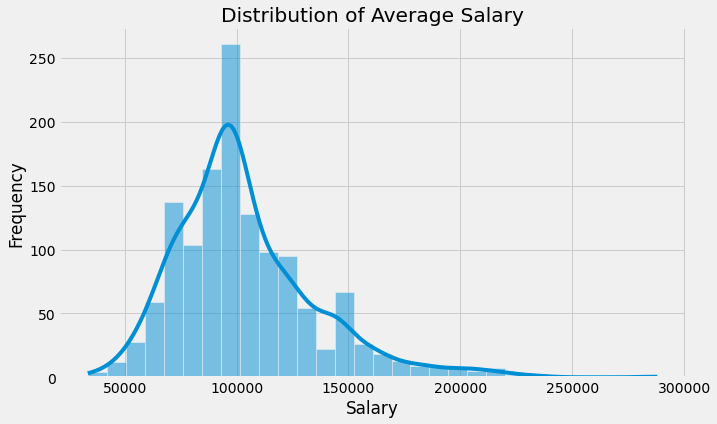

In [39]:
# Distribution of Salaries
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='salary_avg', bins=30, kde=True)
plt.title('Distribution of Average Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [40]:
# number of unique company_name in the dataset
num_companies = df['company_name'].nunique()
num_companies

706

The number of companies we have is so large that for a more visual analysis we will take the top 10 companies that offer the most jobs. Note that the table of job offers we provide below only gives the reader a visual representation of which companies dominate the market, and we still consider all companies in our analysis, not just the ten companies.

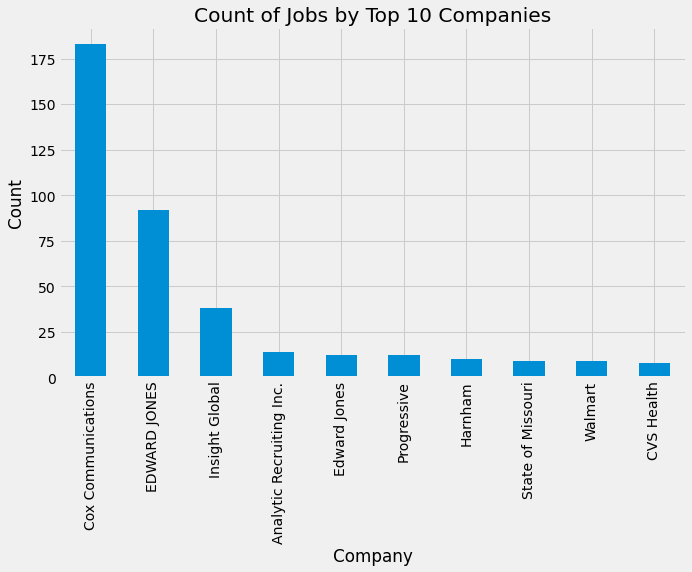

In [41]:
# generate the bar plot, show the top 10 companies with the highest job counts are selected. We find that Cox Cimmunications has the most job count.
top_10_companies = df['company_name'].value_counts().nlargest(10)

# Visualization of top 10 companies
plt.figure(figsize=(10, 6))
top_10_companies.plot(kind='bar')
plt.title('Count of Jobs by Top 10 Companies')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

In [42]:
 #number of unique locations in the dataset
num_locations = df['location'].nunique()

print("There are {} unique locations in the dataset.".format(num_locations))

There are 181 unique locations in the dataset.


Similarly, we have arranged the first 10 positions of the location to make a more intuitive representation.

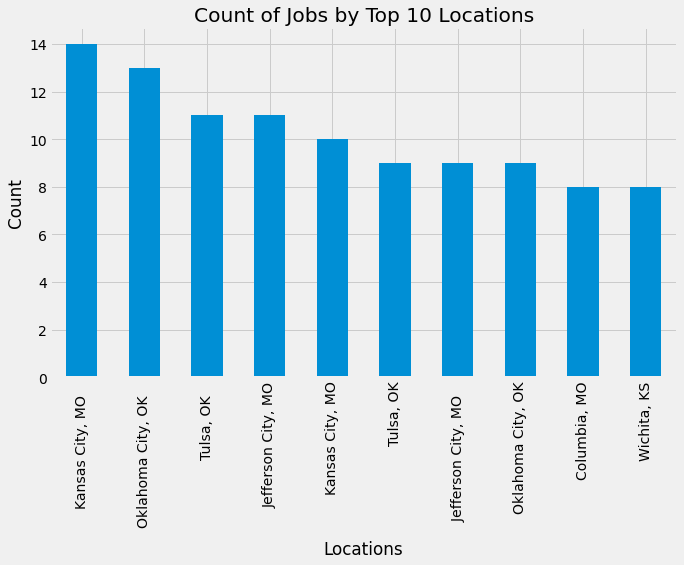

In [43]:
# generate a bar plot of the top 10 job locations based on the count of jobs available in each location, we find that Jefferson City, MO has the most count of jobs.

Location = df[(df['location'] != 'Anywhere') & (df['location'] != ' Anywhere ') & (df['location'] != 'United States')
& (df['location'] != '  United States   ')]
top_10_locations = Location['location'].value_counts().nlargest(10)

# Visualization of Top 10 locations
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar')
plt.title('Count of Jobs by Top 10 Locations')
plt.xlabel('Locations')
plt.ylabel('Count')
plt.show()

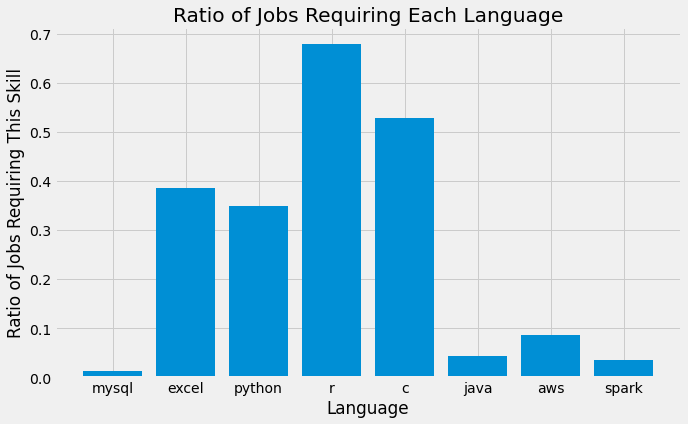

In [44]:
# generate a bar plot and visualization and the percentage of each language that is in demand, we find the highest ratio of jobs requiring skill is r language, mysql is the lowest ratio of jobs
# requiring language.
Languages = ['mysql', 'excel', 'python', 'r', 'c', 'java', 'aws', 'spark']
ratios = [df[lang].mean() for lang in Languages]

plt.figure(figsize=(10, 6))
plt.bar(Languages, ratios)
plt.xlabel('Language')
plt.ylabel('Ratio of Jobs Requiring This Skill')
plt.title('Ratio of Jobs Requiring Each Language')
plt.show()

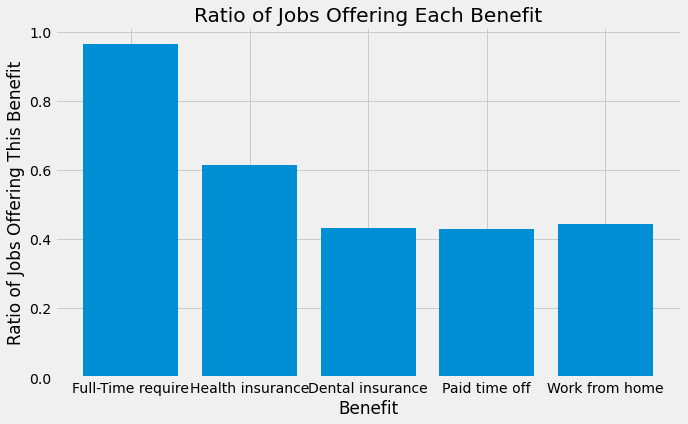

In [45]:
# provide information for Companys' benefit offerings, we find that ratio of full-time require more than work from home.
benefits = ['Full-Time require', 'Health insurance', 'Dental insurance', 'Paid time off', 'Work from home']
ratios = [df[b].mean() for b in benefits]

# Visualization of Companys' benefit offerings
plt.figure(figsize=(10, 6))
plt.bar(benefits, ratios)
plt.xlabel('Benefit')
plt.ylabel('Ratio of Jobs Offering This Benefit')
plt.title('Ratio of Jobs Offering Each Benefit')
plt.show()

### Correlation between company size and salary

After presenting the jobs offered by the companies we analyzed the number of jobs offered and their corresponding wages to determine whether larger companies (those offering more jobs) would have certain characteristics in terms of wages, such as whether they would offer higher or lower wages.

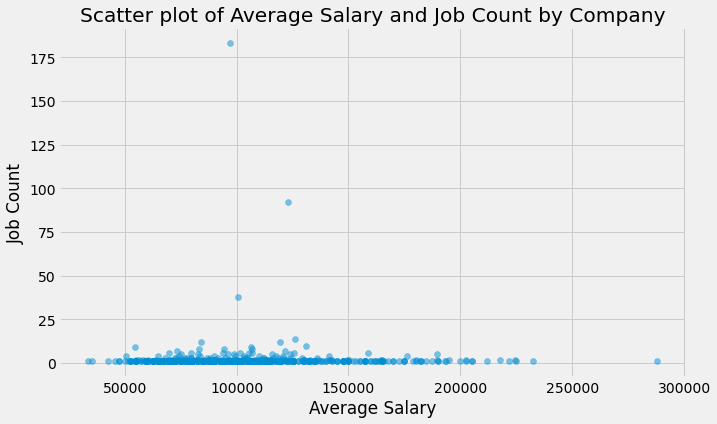

In [46]:
# generate a scatter plot and show the relationship between the average salary and the job count for each company in the dataset. We find that about 165 jobs has about 90000 average salary.
company_job_counts = df['company_name'].value_counts()
company_avg_salaries = df.groupby('company_name')['salary_avg'].mean()
df_correlation = pd.DataFrame({'Job Count': company_job_counts, 'Average Salary': company_avg_salaries})

# visualize the correlation between the average salary and the job count
plt.figure(figsize=(10, 6))
plt.scatter(df_correlation['Average Salary'], df_correlation['Job Count'], alpha=0.5)
plt.title('Scatter plot of Average Salary and Job Count by Company')
plt.xlabel('Average Salary')
plt.ylabel('Job Count')
plt.grid(True)
plt.show()

In [47]:
#Calculate the Pearson correlation coefficient between average salary and number of jobs
correlation = df_correlation['Average Salary'].corr(df_correlation['Job Count'])
print(f'The correlation between average salary and job count is {correlation:.2f}')

The correlation between average salary and job count is 0.01


The scatter plot shows that there is no statistical correlation between the size of the company (as reflected in the number of jobs offered) and the wage, and that even companies offering small jobs can offer very high wages. The wages offered by those large companies are still within the normal distribution rather than extreme values. We therefore conclude that firm size has a limited effect on wage levels. This is supported by our calculation of the Pearson correlation coefficient


### Correlation between location and salary

In [48]:
#Conduct regressivity analysis
model_formula = 'salary_avg ~ C(location)'
results = smf.ols(formula=model_formula, data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             salary_avg   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.7930
Date:                Wed, 29 Nov 2023   Prob (F-statistic):              0.975
Time:                        11:54:39   Log-Likelihood:                -15589.
No. Observations:                1330   AIC:                         3.154e+04
Df Residuals:                    1149   BIC:                         3.248e+04
Df Model:                         180                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------



The R-squared (coefficient of determination) is 0.111, indicating that the variation in location (location) on average wage (salary_avg) explains 11.1% of the model.

The adjusted R-squared (adjusted coefficient of determination) is -.029, a value that takes into account the number of independent variables in the model, further indicating that location has a relatively low explanatory power for average wages.

The F-statistic (F-statistic) is 0.7930, corresponding to a probability (Prob (F-statistic)) of 0.975. This probability is used to test whether location has a significant effect on average wages. Since the probability is less than the significance level, we can reject the null hypothesis and conclude that location has a statistically significant effect on average wages.

Overall, this regression model suggests that location has some explanatory power on average wages, but the explanatory power is relatively low. Other factors not considered may have a greater impact on average wages. Also, it should be noted that this model is based on the assumption of a linear relationship, while the actual situation may involve more complex non-linear relationships, and we will make further and more analysis to refine our results afterwards.


### Correlation between Language and salary

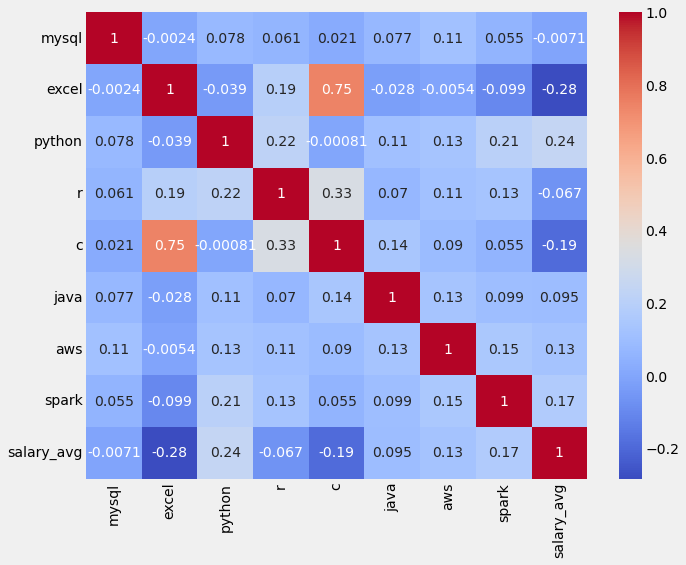

In [49]:
features = ['mysql', 'excel', 'python', 'r', 'c', 'java', 'aws', 'spark', 'salary_avg']
correlation = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

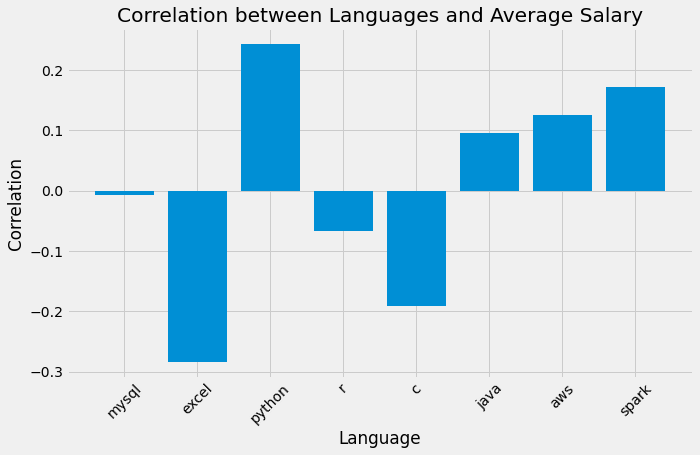

In [50]:
language_correlation = correlation['salary_avg'].drop('salary_avg')
plt.figure(figsize=(10, 6))
plt.bar(language_correlation.index, language_correlation.values)
plt.xlabel('Language')
plt.ylabel('Correlation')
plt.title('Correlation between Languages and Average Salary')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [51]:
print(correlation["salary_avg"])

mysql        -0.007102
excel        -0.284049
python        0.243444
r            -0.067184
c            -0.191825
java          0.095300
aws           0.125314
spark         0.171072
salary_avg    1.000000
Name: salary_avg, dtype: float64


Based on the analysis, we can draw the following conclusions about the correlation between programming languages and salaries

    MySQL: No significant correlation
    Excel: Negative correlation
    Python: Positive correlation
    R: Weak negative correlation
    C: Negative correlation
    Java: No significant correlation
    AWS: No significant correlation
    Spark: No significant correlation

Part 2: Correlation between numbers of coding skills and average salary

Prediction of the correlation between the number of languages mastered and wages using a simple linear regression model


## Machine Learning Model

### Linear Regression 

Mean Squared Error: 1069181041.6315506
R-squared: -0.0007749715191005535


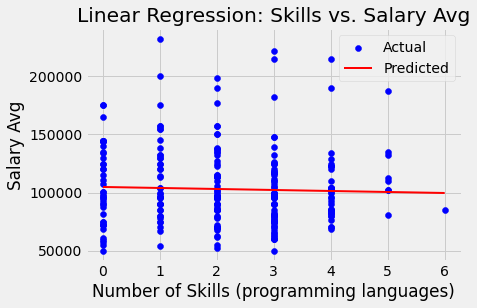

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame
X = df[['skills']]
y = df['salary_avg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Print evaluation metrics
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R-squared:', r2_score(y_test, predictions))

# Sort the values for a smoother line plot
sort_order = np.argsort(X_test.values.flatten())

# Visualize the actual and predicted values using scatter plots
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test.values[sort_order], predictions[sort_order], color='red', linewidth=2, label='Predicted')

# Add a legend to the plot
plt.legend()

# Set the labels for the X and Y axes, and title of the plot
plt.xlabel('Number of Skills (programming languages)')
plt.ylabel('Salary Avg')
plt.title('Linear Regression: Skills vs. Salary Avg')

# Display the plot
plt.show()


oops, we find that the R-squared of the simple linear model is very low, perhaps because the correlation between the data does not show a linear relationship, let's try a polynomial regression model instead

### Polynomial Regression

Mean Squared Error: 1067642518.2237675
R-squared: 0.0006651173523368747


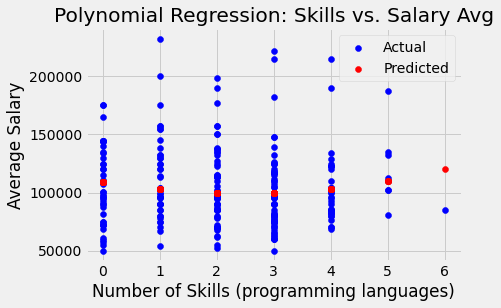

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = df[['skills']]
y = df['salary_avg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with PolynomialFeatures and LinearRegression
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate and print evaluation metrics
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R-squared:', r2_score(y_test, predictions))

# Visualize the actual and predicted values using a scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')

# Add a legend to the plot
plt.legend()

# Set the labels for the X and Y axes, and title of the plot
plt.xlabel('Number of Skills (programming languages)')
plt.ylabel('Average Salary')
plt.title('Polynomial Regression: Skills vs. Salary Avg')

# Display the plot
plt.show()

However, the multinomial regression also does not perform well (although there is some improvement) so we do not think there is a strong correlation between the number of languages mastered and salary levels - instead, according to the model, they show a very weak negative correlation, which we think may be due to the fact that companies prefer to recruit employees who are fluent in certain languages rather than those who can use multiple computer languages in general

### Correlation between employee benefits and wages

#### Relationship between different programming languages themselves and salary

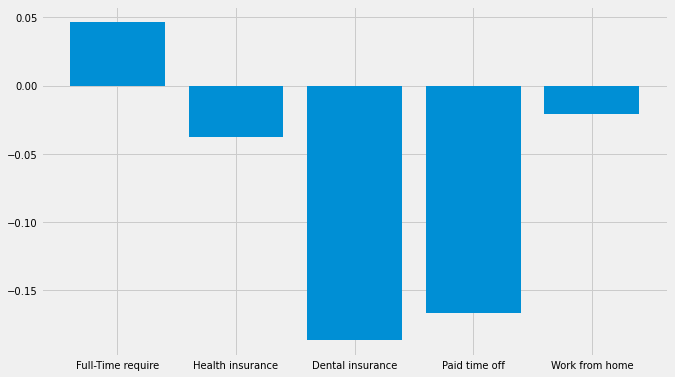

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

benefits = ['Full-Time require', 'Health insurance', 'Dental insurance', 'Paid time off', 'Work from home']

# Create an empty dictionary to store the benefit correlations
benefit_correlations = {}

# Calculate the correlation between the 'salary_avg' column and each benefit
for benefit in benefits:
    correlation = df['salary_avg'].corr(df[benefit])
    benefit_correlations[benefit] = correlation

# Create a figure and set its size
plt.figure(figsize=(10, 6))

# Plot a bar chart of the benefit correlations
plt.bar(benefit_correlations.keys(), benefit_correlations.values())

# Set the fontsize of the tick labels
plt.tick_params(labelsize=10)

# Display the plot
plt.show()

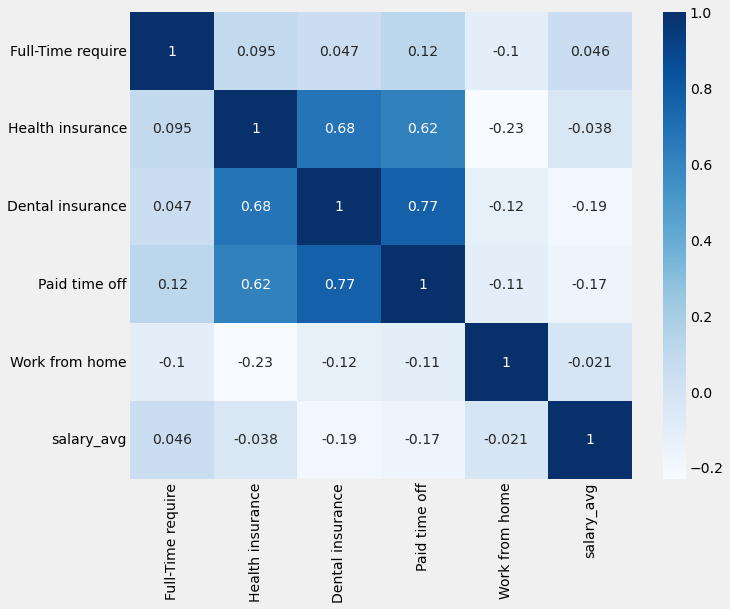

In [55]:
features = benefits + ['salary_avg']

# Calculate the correlation matrix
correlation = df[features].corr()

# Create a figure and set its size
plt.figure(figsize=(10, 8))

# Plot the correlation matrix as a heatmap
# Annotate the heatmap with the correlation values
# Use the "Blues" colormap for the heatmap colors
sns.heatmap(correlation, annot=True, cmap="Blues")

# Display the plot
plt.show()

In [56]:
print(correlation["salary_avg"])

Full-Time require    0.046328
Health insurance    -0.038062
Dental insurance    -0.186680
Paid time off       -0.166454
Work from home      -0.020758
salary_avg           1.000000
Name: salary_avg, dtype: float64


Based on the analysis, we can draw the following conclusions about the correlation between benefits and salaries

  1]  Full-Time require: No significant correlation
  2]  Health insurance: Positive correlation
  3]  Dental insurance: Negative correlation
  4]  Paid time off: Negative correlation
  5]  Work from home: Negative correlation

##### Correlation between numbers of benefits and average salary

In [57]:
df['total_benefits'] = df[['Health insurance', 'Dental insurance', 'Paid time off', 'Work from home', 'mysql', 'excel', 'python', 'r', 'c', 'java', 'aws', 'spark']].sum(axis=1)
df.loc[df['Full-Time require'] == 0, 'total_benefits'] = 0

Mean Squared Error: 1047868994.0285851
R-squared: 0.01917353392795118


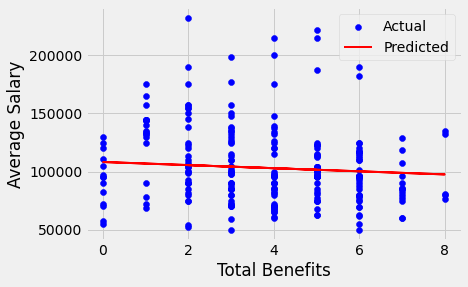

In [58]:
X = df['total_benefits'].values.reshape(-1, 1)
y = df['salary_avg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model and train it on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate and print evaluation metrics
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R-squared:', r2_score(y_test, predictions))

# Visualize the actual and predicted values using a scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted')

# Add legend to the plot
plt.legend()

# Set the labels for the X and Y axes
plt.xlabel('Total Benefits')
plt.ylabel('Average Salary')

# Display the plot
plt.show()

Again, after finding that the model did not perform well we changed to a different model, this time we chose to use Random Forest

### Random Forest Regression

Mean Squared Error: 1003885878.7341361
R-squared: 0.060342614974276176


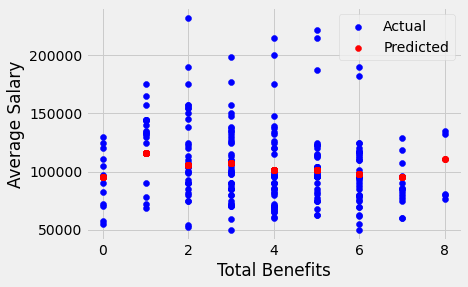

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Define the predictor variable (X) and the target variable (y)
X = df['total_benefits'].values.reshape(-1, 1)
y = df['salary_avg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model and train it on the training data
model = RandomForestRegressor(random_state=45)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate and print evaluation metrics
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R-squared:', r2_score(y_test, predictions))

# Visualize the actual and predicted values using a scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.legend()

# Set the labels for X and Y axes
plt.xlabel('Total Benefits')
plt.ylabel('Average Salary')

# Display the plot
plt.show()

However, we find that both linear regressions and random forests perform very poorly - which we believe indicates that there is no strong correlation between the number of benefits and wages.

### Predictions



After performing the analysis we want to complete a prediction program that is able to predict the possible salary of a position based on the input characteristic variables. We will first build the model using some of the variables and then bring in all of them to see what the difference is. We will also use multiple models for comparison

Here is a program to make predicitions on a person's salary based on the programming languages he knows. The input variable is an array with 8 binary entries (0 or 1) each corresponds to whether he knows the corresponding language or not. For example, if the first entry of the input is 1, it shows the person knows mysql.


In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

X = df[['mysql', 'excel', 'python', "r", "c", "java", "aws", "spark"]]
y = df['salary_avg']

# Perform one-hot encoding for the skills columns
encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 2, 3, 4, 5, 6, 7])], remainder='passthrough')
X_encoded = encoder.fit_transform(X)

model = LinearRegression()
model.fit(X_encoded, y)

# Make predictions on new data
new_skills = [[1, 0, 1, 0, 0, 1, 1, 1]]  # Example new skills to predict salary for (mysql: 1, excel: 0, python: 1, etc.)
new_skills_encoded = encoder.transform(new_skills)
predictions = model.predict(new_skills_encoded)

print("Your estimated salary is:", predictions)

Your estimated salary is: [144806.35158705]


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a Random Forest Regressor model
rfr = RandomForestRegressor(n_estimators=100, random_state=45)

# Train the model
rfr.fit(X_train, y_train)

# Make predictions
y_pred = rfr.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 23303.885265300043


For the wage forecasting task, we focused our attention on Mean Absolute Error (MAE), as it provides an intuitive interpretation of the forecast results and is insensitive to outliers.

Although our model is not perfect, by comparing the models we can find that Random Forest performs best when dealing with complex features.

This is because random forest is an integrated approach, consisting of multiple decision trees. Each tree can learn feature relationships in the data autonomously, including nonlinear relationships. When there are complex nonlinear relationships between features, random forest can better capture these patterns, while linear models such as linear regression, gradient regression and SVR may not be able to effectively model nonlinear relationships.

On the other hand, random forests can provide an assessment of the importance by calculating the importance of each feature in the random forest, we can understand which features contribute more to the prediction results. This helps to filter and select the most relevant features and reduce the influence of irrelevant or redundant features, thus improving the performance of the model.

Originally, we expected that adding more variables would make the results worse, because more variables means more interference - well, precisely because of the ability of the random forest to handle abstract features, it performs better (although only a little) after introducing more variables.

In our utilization of this job dataset, we recognize the possibility of inherent biases. Our exploration into various factors such as job titles may be limited due to the exclusive use of this dataset. With the rapid advancement of technology, new job roles are constantly emerging, and these might not be fully represented in our dataset. Therefore, we acknowledge that our findings may not entirely reflect the broader job market, especially those roles absent from our dataset. To mitigate this, we will endeavor to incorporate additional datasets in our analysis to enhance the representativeness of our research.

In this project, we used the Data Analyst Job Postings dataset to examine the various factors that may influence the salaries of data analysts. The variables we studied included the company rating, location (city), benefits such as vacation or insurance availability, and required skills. The primary hypothesis was that the number of coding skills mastered by an individual significantly predicts annual salary. This hypothesis stemmed from the belief that having multiple programming skills can demonstrate a wider range of abilities, making a candidate more attractive to employers and improving their bargaining power in salary negotiations.

Our analyses involved examining the correlations between individual factors and salaries, followed by the development of predictive models. We found that the size of a company does not significantly correlate with wages. Location, on the other hand, was found to have a statistically significant impact on average wages, but the explanatory power was relatively low. Among the programming languages, Python showed a positive correlation with salary, while Excel and C showed negative correlations. Given these findings, we can reject the null hypothesis that the number of coding skills mastered, the location of work, and the company one works for have no significant impact on their annual salary. Instead, our data supports the alternative hypothesis, indicating that specific coding skills, location, and certain employee benefits do impact the salary of a data analyst. However, it is worth noting that the number of coding skills mastered did not show a strong correlation with salary levels, suggesting that the types of skills may be more important than the quantity.

Finally, there were several limitations to our project. First, our dataset might not be comprehensive enough to capture all the factors that affect salaries. Second, the linear regression models we used might not be able to effectively capture the complex, possibly non-linear relationships between the variables and salaries. Despite these limitations, this work contributes to a better understanding of the factors influencing data analysts' salaries, which can inform individuals and organizations about what to prioritize in career development and recruitment processes. On a societal level, the findings from this study can lead to greater transparency in how salaries are determined in the tech industry. By understanding the factors that truly contribute to salary levels, individuals can have more informed discussions with employers during salary negotiations. Similarly, companies can also ensure they are offering competitive salaries based on concrete data, rather than relying on arbitrary criteria.